In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluar Modelo
from sklearn.metrics import mean_squared_error, r2_score

In [189]:
df = pd.read_excel('Dataset_final.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [190]:
df.dropna(inplace=True)
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  294 non-null    int64  
 1   Nombre                     294 non-null    object 
 2   Apellidos                  294 non-null    object 
 3   Direccción                 294 non-null    object 
 4   Teléfono                   294 non-null    object 
 5   Edad                       294 non-null    int64  
 6   Estatura                   294 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 
 14 

In [191]:
df = df.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    object 
 4   Género                     294 non-null    object 
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    object 
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 25.3+ KB


In [192]:
df['Apoyo económico de padres'].unique()

array(['No', 'Sí', 'Si'], dtype=object)

In [193]:
df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')

In [194]:
df['Apoyo económico de padres'].unique()

array(['No', 'Si'], dtype=object)

In [195]:
df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)
df.describe()

,Edad,Estatura,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,17.683673,1.709150,2.673469,3.431973,3.520408,0.544218,10.098639
std,2.006459,0.065865,1.139806,1.093168,1.047307,0.498890,0.792756
min,15.000000,1.550000,0.000000,1.000000,1.000000,0.000000,9.000000
25%,16.000000,1.650000,2.000000,3.000000,3.000000,0.000000,9.000000
50%,17.000000,1.700000,3.000000,3.000000,4.000000,1.000000,10.000000
75%,19.000000,1.750000,4.000000,4.000000,4.000000,1.000000,11.000000
max,25.000000,1.850000,5.000000,5.000000,5.000000,1.000000,11.000000


In [196]:
df['Género'].unique()

array(['Femenino', 'Masculino', 'Mascu'], dtype=object)

In [197]:
df['Género'] = np.where(df['Género'] == 'Femenino', 0, 1)
# df['Género'].unique()
df.describe()

,Edad,Estatura,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,17.683673,1.709150,0.462585,2.673469,3.431973,3.520408,0.544218,10.098639
std,2.006459,0.065865,0.499448,1.139806,1.093168,1.047307,0.498890,0.792756
min,15.000000,1.550000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000
25%,16.000000,1.650000,0.000000,2.000000,3.000000,3.000000,0.000000,9.000000
50%,17.000000,1.700000,0.000000,3.000000,3.000000,4.000000,1.000000,10.000000
75%,19.000000,1.750000,1.000000,4.000000,4.000000,4.000000,1.000000,11.000000
max,25.000000,1.850000,1.000000,5.000000,5.000000,5.000000,1.000000,11.000000


In [198]:
df['Tipo colegio'].unique()

array(['Público', 'Privado', 'Públic', 'Privad', 'Públi'], dtype=object)

In [199]:
df['Tipo colegio'] = df['Tipo colegio'].replace('Privad', 'Privado')
df['Tipo colegio'] = np.where(df['Tipo colegio'] == 'Privado', 1, 0)
df['Tipo colegio'].unique()

array([0, 1])

In [200]:
df['Área de residencia'].unique()

array(['Urbana', 'Rural', 'Urba', 'Urban'], dtype=object)

In [201]:
df['Área de residencia'] = np.where(df['Área de residencia'] == 'Rural', 1, 0)
df.describe()

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,17.683673,1.709150,0.346939,0.418367,0.462585,2.673469,3.431973,3.520408,0.544218,10.098639
std,2.006459,0.065865,0.476808,0.494132,0.499448,1.139806,1.093168,1.047307,0.498890,0.792756
min,15.000000,1.550000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000
25%,16.000000,1.650000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,0.000000,9.000000
50%,17.000000,1.700000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,10.000000
75%,19.000000,1.750000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000,11.000000
max,25.000000,1.850000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,11.000000


In [202]:
df.to_excel('Lineal.xlsx')

In [203]:
correlacion_matriz = df.corr().abs()
most_correlacion = correlacion_matriz.unstack().sort_values(ascending=False).drop_duplicates()

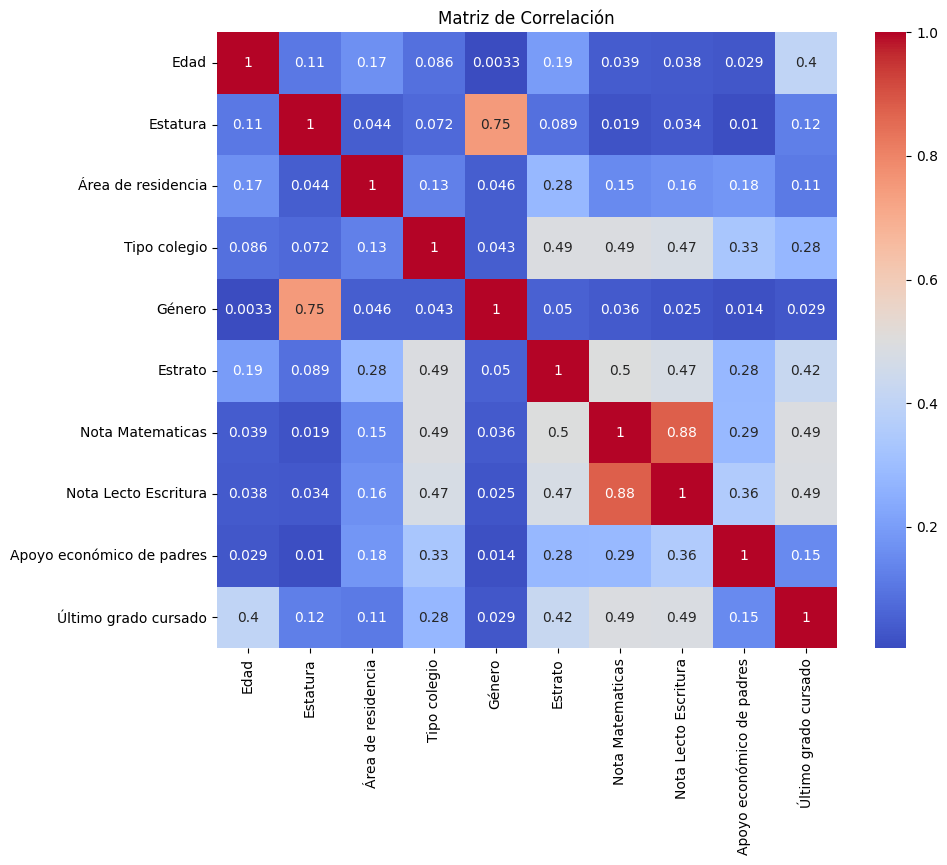

In [204]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [205]:
for (var1, var2), correlacion in most_correlacion.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación en '{correlacion}'")

Las variables 'Edad' y 'Edad' tienen una correlación en '1.0'
Las variables 'Nota Matematicas' y 'Nota Lecto Escritura' tienen una correlación en '0.8791409294144626'
Las variables 'Estatura' y 'Género' tienen una correlación en '0.748623045517334'
Las variables 'Estrato' y 'Nota Matematicas' tienen una correlación en '0.49980986674334094'
Las variables 'Tipo colegio' y 'Nota Matematicas' tienen una correlación en '0.4919918470036402'
Las variables 'Estrato' y 'Tipo colegio' tienen una correlación en '0.49183326850347103'
Las variables 'Nota Matematicas' y 'Último grado cursado' tienen una correlación en '0.4902080821294931'
Las variables 'Último grado cursado' y 'Nota Lecto Escritura' tienen una correlación en '0.48879918670351447'
Las variables 'Tipo colegio' y 'Nota Lecto Escritura' tienen una correlación en '0.47477323528228726'
Las variables 'Nota Lecto Escritura' y 'Estrato' tienen una correlación en '0.47449196012504585'
Las variables 'Último grado cursado' y 'Estrato' tienen un

In [206]:
df = df.drop(['Edad', 'Área de residencia', 'Tipo colegio', 'Estrato', 'Último grado cursado'], axis=1)
df

,Estatura,Género,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres
0,1.57,0,1.0,3.0,0
1,1.75,1,5.0,4.0,1
2,1.63,0,3.0,2.0,1
3,1.80,1,2.0,2.0,0
4,1.64,0,4.0,5.0,1
...,...,...,...,...,...
290,1.62,0,4.0,4.0,1
291,1.80,1,5.0,5.0,1
292,1.65,0,3.0,3.0,0
293,1.80,1,3.0,3.0,1


In [207]:
df.columns = ['estatura', 'genero', 'matematicas', 'lecto_escritura', 'apoyo_economico']

df.describe()

,estatura,genero,matematicas,lecto_escritura,apoyo_economico
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1.709150,0.462585,3.431973,3.520408,0.544218
std,0.065865,0.499448,1.093168,1.047307,0.498890
min,1.550000,0.000000,1.000000,1.000000,0.000000
25%,1.650000,0.000000,3.000000,3.000000,0.000000
50%,1.700000,0.000000,3.000000,4.000000,1.000000
75%,1.750000,1.000000,4.000000,4.000000,1.000000
max,1.850000,1.000000,5.000000,5.000000,1.000000


In [208]:
df['Promedio'] = (df['matematicas'] + df['lecto_escritura']) / 2
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,Promedio
0,1.57,0,1.0,3.0,0,2.0
1,1.75,1,5.0,4.0,1,4.5
2,1.63,0,3.0,2.0,1,2.5
3,1.80,1,2.0,2.0,0,2.0
4,1.64,0,4.0,5.0,1,4.5
...,...,...,...,...,...,...
290,1.62,0,4.0,4.0,1,4.0
291,1.80,1,5.0,5.0,1,5.0
292,1.65,0,3.0,3.0,0,3.0
293,1.80,1,3.0,3.0,1,3.0


In [209]:
df['Riesgo'] = np.where((df['Promedio'] < 3.5), 1, 0)
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,Promedio,Riesgo
0,1.57,0,1.0,3.0,0,2.0,1
1,1.75,1,5.0,4.0,1,4.5,0
2,1.63,0,3.0,2.0,1,2.5,1
3,1.80,1,2.0,2.0,0,2.0,1
4,1.64,0,4.0,5.0,1,4.5,0
...,...,...,...,...,...,...,...
290,1.62,0,4.0,4.0,1,4.0,0
291,1.80,1,5.0,5.0,1,5.0,0
292,1.65,0,3.0,3.0,0,3.0,1
293,1.80,1,3.0,3.0,1,3.0,1


Entrenamiendo del modelo

In [210]:
variables = ['matematicas', 'lecto_escritura', 'apoyo_economico']

x = df[variables]
y = df['Riesgo']

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [212]:
model = LinearRegression()

In [213]:
model.fit(x_train, y_train)

LinearRegression()

In [214]:
y_pred = model.predict(x_test)

Evaluar el modelo

In [215]:
print("Coheficiente de Determinación: %.2f" % r2_score(y_test, y_pred))
print("Rol Cuadratico Medio: %.2f" % mean_squared_error(y_test, y_pred))


Coheficiente de Determinación: 0.67
Rol Cuadratico Medio: 0.08


In [216]:
nmat = 3.5
nlecto = 4
apoyo = 1

pred = model.predict([[nmat, nlecto, apoyo]])
pred_procentaje = pred[0] * 100
print(f"La predicción de Riego: {round(pred_procentaje, 2)}%")

La predicción de Riego: 33.6%


c:\Users\UwU\Documents\python_darkking\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [218]:
import pickle

with open('modelo_regresion.pkl', 'wb') as file:
    
    pickle.dump(model, file)